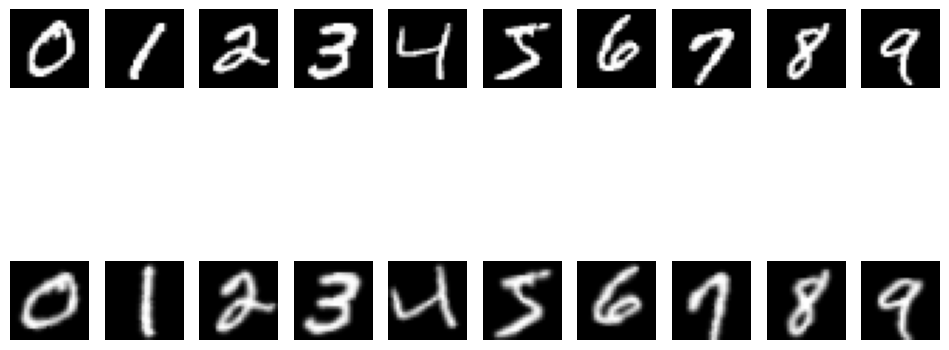

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Select one sample image from each class (digit) for demonstration purposes
unique_digits = np.unique(y_train)
subset_indices = [np.where(y_train == digit)[0][0] for digit in unique_digits]
subset_images = x_train[subset_indices]

# Define a function to perform rotation and scaling
def transform_image(image, angle=30, scale=0.9):
    # Assume the input image is 2D, we add an extra dimension to make it 3D
    image = image.reshape(28, 28, 1)
    # Rotate the image
    rotated_image = tf.keras.preprocessing.image.random_rotation(
        image, angle, row_axis=0, col_axis=1, channel_axis=2
    )
    # Scale the image
    scaled_image = tf.keras.preprocessing.image.random_zoom(
        rotated_image, (scale, scale), row_axis=0, col_axis=1, channel_axis=2
    )
    # Convert back to 2D
    return scaled_image[..., 0]  # Remove the channel dimension

# Compute edge-based descriptors (Canny edge detector)
def compute_descriptors(images):
    descriptors = []
    for image in images:
        # The input to feature.canny should be 2D, so make sure to pass the 2D image
        edges = feature.canny(image, sigma=1)
        # Flatten the edge image to create a simple descriptor
        descriptor = edges.flatten()
        descriptors.append(descriptor)
    return np.array(descriptors)

